# Predicting Diamond Prices

### Data Set Information:

**A dataset containing the prices and other features of almost 54,000 diamonds.**

### Features description

**Number of Attributes: 10 (9 predictive features, 1 target)**

Feature Information: A data frame with 53,940 rows and 10 variables:

price: price in US dollars (326 - 18,823) **(target)**

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

In [1]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
%matplotlib inline

## Data Preparation

In [11]:
# importing data

diamonds = pd.read_csv("diamonds.csv")

In [12]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
diamonds.shape

(53940, 10)

In [14]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


One of the transformations we must perform is to tranform the categorical features to the one-hot-encoding format.

In [15]:
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [16]:
diamonds['cut'].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [17]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)

In [19]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [18]:
diamonds.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [23]:
diamonds[['cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',]].head()

,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H
0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0


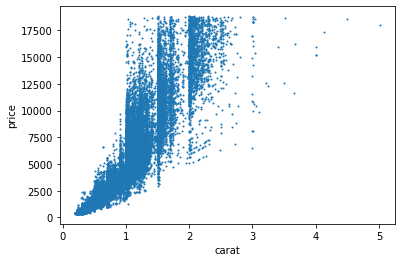

In [20]:
diamonds.plot.scatter(x='carat', y='price', s=1);

In [12]:
# To account for the non-linearity let's calculate the square of 
#carat (because we would later use Multiple Linear 
#Regression which prefer linearity)
diamonds['carat_squared'] = diamonds['carat']**2

<AxesSubplot:xlabel='carat_squared', ylabel='price'>

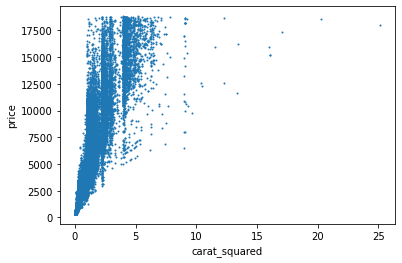

In [16]:
diamonds.plot.scatter(x='carat_squared', y='price',s=1)

### Scaling: an important operation

Since the features have different scales (<code>carat</code> goes from 0 to 5, <code>y</code> goes from 0 to 58) we need to be careful. Making sure that each feature has approximately the same scale can be a crucial preprocessing step. In this case we will use the <code>RobustScaler</code> object which scales the features to a common scale and it is robust to outliers.

### Getting the train and test sets

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [26]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
cut_Fair,53940.0,0.029848,0.170169,0.0,0.00,0.00,0.00,1.00
cut_Good,53940.0,0.090953,0.287545,0.0,0.00,0.00,0.00,1.00
cut_Ideal,53940.0,0.399537,0.489808,0.0,0.00,0.00,1.00,1.00


In [27]:
target_name = 'price'
robust_scaler = RobustScaler()
X = diamonds.drop('price', axis=1)
X = robust_scaler.fit_transform(X)
y = diamonds[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
scaled_columns = pd.DataFrame(X, columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'])
scaled_columns.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.734375,-0.200000,-0.666667,-0.956284,-0.950549,-0.973451,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.765625,-1.333333,1.333333,-0.989071,-1.027473,-1.079646,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.734375,-3.266667,2.666667,-0.901639,-0.901099,-1.079646,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.640625,0.400000,0.333333,-0.819672,-0.813187,-0.796460,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.609375,1.000000,0.333333,-0.743169,-0.747253,-0.690265,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
scaled_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.153031,0.740643,-0.781250,-0.468750,0.0,0.531250,6.734375
depth,53940.0,-0.033730,0.955081,-12.533333,-0.533333,0.0,0.466667,11.466667
table,53940.0,0.152395,0.744830,-4.666667,-0.333333,0.0,0.666667,12.666667
x,53940.0,0.017026,0.612984,-3.114754,-0.540984,0.0,0.459016,2.754098
y,53940.0,0.013476,0.627547,-3.137363,-0.543956,0.0,0.456044,29.225275
z,53940.0,0.007729,0.624512,-3.123894,-0.548673,0.0,0.451327,25.017699
cut_Fair,53940.0,0.029848,0.170169,0.000000,0.000000,0.0,0.000000,1.000000
cut_Good,53940.0,0.090953,0.287545,0.000000,0.000000,0.0,0.000000,1.000000
cut_Ideal,53940.0,0.399537,0.489808,0.000000,0.000000,0.0,1.000000,1.000000
cut_Premium,53940.0,0.255673,0.436243,0.000000,0.000000,0.0,1.000000,1.000000


### Preparing a DataFrame for model analysis

In [37]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['NULL', 'MLR', 'KNN', 'LASSO'])
models

,NULL,MLR,KNN,LASSO
train_mse,NaN,NaN,NaN,NaN
test_mse,NaN,NaN,NaN,NaN


## The Null model: always predict the average of the target

In [38]:
y_pred_null = y_train.mean()
models.loc['train_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), 
                                                    y_true=y_train)
models.loc['test_mse','NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), 
                                                   y_true=y_test)

In [39]:
models

,NULL,MLR,KNN,LASSO
train_mse,15923897.02723,NaN,NaN,NaN
test_mse,15881144.435486,NaN,NaN,NaN


## A. Multiple Linear Regression

In [40]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use the trainning data to train the estimator
linear_regression.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_mse','MLR'] = mean_squared_error(y_pred=linear_regression.predict(X_test), 
                                                   y_true=y_test)

In [41]:
models

,NULL,MLR,KNN,LASSO
train_mse,15923897.02723,1272894.576034,NaN,NaN
test_mse,15881144.435486,1291873.774958,NaN,NaN


## B. K-Nearest Neighbors Model

In [42]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_test), 
                                                   y_true=y_test)

In [43]:
models

,NULL,MLR,KNN,LASSO
train_mse,15923897.02723,1272894.576034,67.310117,NaN
test_mse,15881144.435486,1291873.774958,636970.401266,NaN


## C. Lasso

In [44]:
# 1. Import the estimator object (model)
from sklearn.linear_model import Lasso
# 2. Create an instance of the estimator
lasso = Lasso(alpha=0.1)
# 3. Use the trainning data to train the estimator
lasso.fit(X_train, y_train)
# 4. Evaluate the model
models.loc['train_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(X_train), 
                                                    y_true=y_train)

models.loc['test_mse','LASSO'] = mean_squared_error(y_pred=lasso.predict(X_test), 
                                                   y_true=y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84381801.36668396, tolerance: 68714800.45190103
  model = cd_fast.enet_coordinate_descent(


In [47]:
models

,NULL,MLR,KNN,LASSO
train_mse,15923897.02723,1272894.576034,67.310117,1272884.077388
test_mse,15881144.435486,1291873.774958,636970.401266,1291996.1454


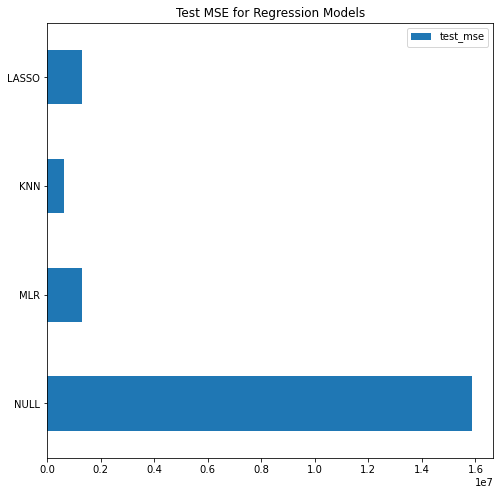

In [52]:
fig, ax = plt.subplots(figsize=(8,8))
models.loc['test_mse'].plot(kind='barh')
ax.set_title('Test MSE for Regression Models')
ax.legend(loc=1, ncol=4);

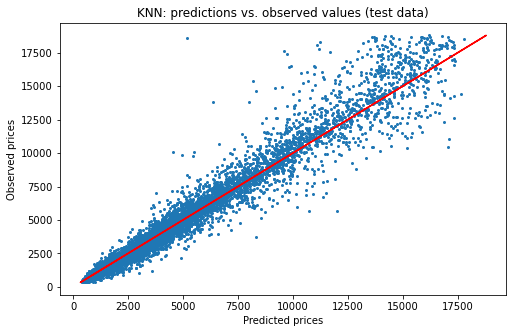

In [53]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices');

## Using the best model to predict the price of a diamond

If you are happy with your model we can re-train it using all observations, and then use it to make predictions.

In [54]:
# Re-training with all the observations
knn_final = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn_final.fit(X, y)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, n_neighbors=10,
                    weights='distance')

In [59]:
# Making predictions
new_diamond = OrderedDict([('carat',0.45), ('depth',62.3), ('table',59.0), ('x',3.95),
                           ('y',3.92), ('z',2.45), ('cut_Fair', 0.0), ('cut_Good',0.0), ('cut_Ideal',0.0),
                           ('cut_Premium',1.0), ('cut_Very Good',0.0), ('color_D', 0.0), ('color_E',0.0), 
                           ('color_F',0.0), ('color_G',1.0), ('color_H',0.0), ('color_I',0.0),
                           ('color_J',0.0), ( 'clarity_I1', 0.0), ('clarity_IF',0.0), ('clarity_SI1',0.0),
                           ('clarity_SI2',0.0), ('clarity_VS1',0.0), ('clarity_VS2',0.0),
                           ('clarity_VVS1',1.0), ('clarity_VVS2',0.0)])

new_diamond = pd.Series(new_diamond).values.reshape(1,-1)

In [60]:
knn_final.predict(new_diamond)

array([5827.73519017])